<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [66]:
print("data dimensions", boston_df.shape)
print("\n Numerical Variables：")
display(boston_df.describe().T.head())

data dimensions (506, 15)

 Numerical Variables：


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000


# Task 2: Generate Descriptive Statistics and Visualizations

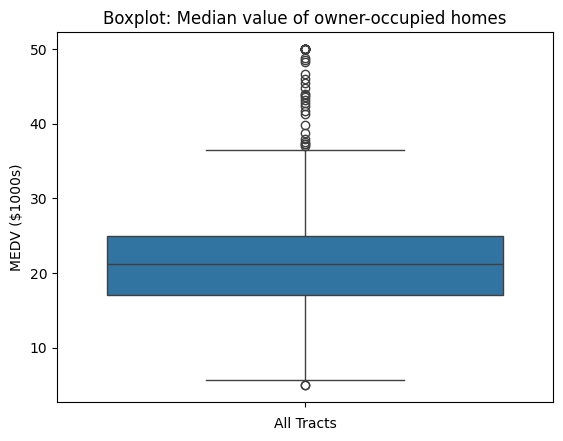

In [67]:
pyplot.figure()
sns.boxplot(y="MEDV",data=boston_df)
pyplot.title("Boxplot: Median value of owner-occupied homes")
pyplot.ylabel("MEDV ($1000s)")
pyplot.xlabel("All Tracts") 
pyplot.show()

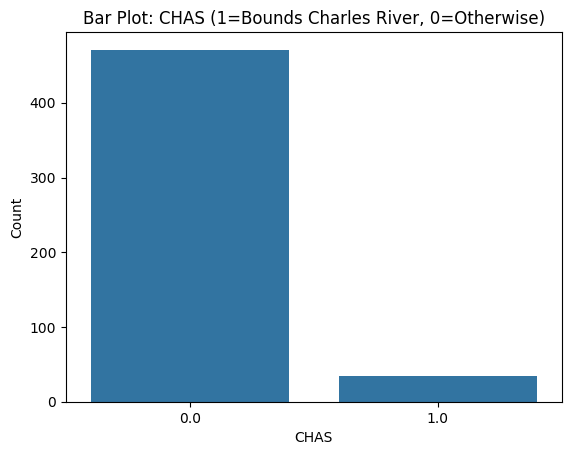

In [68]:
pyplot.figure()
sns.countplot(x=boston_df["CHAS"])
pyplot.title("Bar Plot: CHAS (1=Bounds Charles River, 0=Otherwise)")
pyplot.xlabel("CHAS")
pyplot.ylabel("Count")
pyplot.show()

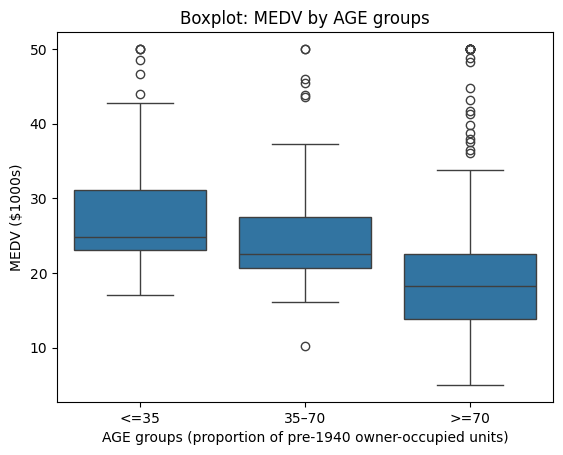

In [69]:
age_bins = [0, 35, 70, 100]
age_labels = ["<=35", "35–70", ">=70"]
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=age_bins, labels=age_labels)

pyplot.figure()
sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df, order=age_labels)
pyplot.title("Boxplot: MEDV by AGE groups")
pyplot.xlabel("AGE groups (proportion of pre-1940 owner-occupied units)")
pyplot.ylabel("MEDV ($1000s)")
pyplot.show()

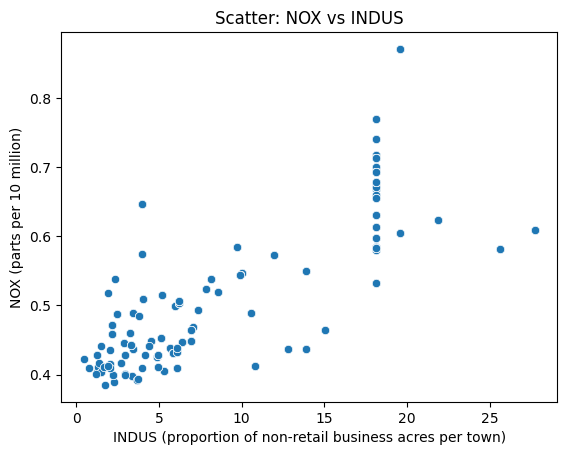

In [94]:
pyplot.figure()
ax=sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
pyplot.title("Scatter: NOX vs INDUS")
pyplot.xlabel("INDUS (proportion of non-retail business acres per town)")
pyplot.ylabel("NOX (parts per 10 million)")
pyplot.show()

The scatter plot shows a positive relationship between NOX and INDUS.
As the proportion of non-retail business acres (INDUS) increases, the nitric oxide concentration (NOX) also tends to rise.
This suggests that areas with more industrial land use generally have higher air pollution levels.

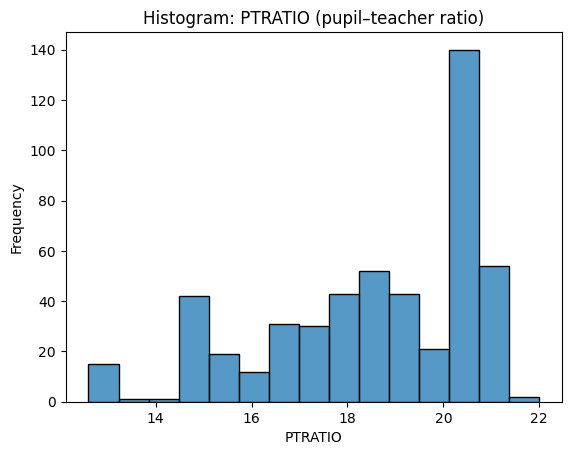

In [71]:
pyplot.figure()
sns.histplot(boston_df["PTRATIO"], bins=15, kde=False)
pyplot.title("Histogram: PTRATIO (pupil–teacher ratio)")
pyplot.xlabel("PTRATIO")
pyplot.ylabel("Frequency")
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.

In [72]:
alpha = 0.05

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis:
*   $H_0: \mu_1=\mu_2 $ There is no significant difference in the median value of houses bounded by the Charles River
*   $H_1: \mu_1 \ne \mu_2$ There is a significant difference in the median value of houses bounded by the Charles River

We can use Levene’s Test to check equality of variances, and then perform an Independent Samples T-test.

In [73]:
levene_test = scipy.stats.levene(boston_df[boston_df["CHAS"] == 1]["MEDV"], 
                                 boston_df[boston_df["CHAS"] == 0]["MEDV"], 
                                 center='mean')
levene_test

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is greater than 0.05, we assume equal variances.

In [74]:
t_test = scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"], 
                               boston_df[boston_df["CHAS"] == 0]["MEDV"], 
                               equal_var=True)
t_test

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since the p-value is less than $ \alpha=0.05 $ , we reject the null hypothesis ( $H_0$ ).
There is a significant difference in the median value of houses between the tracts bounded by the Charles River and those that are not.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis:
*   $H_0: \mu_1=\mu_2=\mu_3$ The mean median home values are equal among the three age groups
*   $H_1: $ At least one of the group means is different

In [89]:
boston_df.loc[boston_df["AGE"] <= 35, "age_group"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] <= 70), "age_group"] = "between 35 and 70 years"
boston_df.loc[boston_df["AGE"] > 70, "age_group"] = "70 years and older"

In [90]:
levene_test = scipy.stats.levene(boston_df[boston_df["age_group"] == "35 years and younger"]["MEDV"], 
                                 boston_df[boston_df["age_group"] == "between 35 and 70 years"]["MEDV"], 
                                 boston_df[boston_df["age_group"] == "70 years and older"]["MEDV"],
                                 center="mean")
levene_test

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [92]:
g1 = boston_df[boston_df["age_group"] == "35 years and younger"]["MEDV"]
g2 = boston_df[boston_df["age_group"] == "between 35 and 70 years"]["MEDV"]
g3 = boston_df[boston_df["age_group"] == "70 years and older"]["MEDV"]

f_statistic, p_value = scipy.stats.f_oneway(g1, g2, g3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since the p-value is less than $ \alpha=0.05 $, we reject the null hypothesis ( $H_0$ ).
There is a statistically significant difference in the median value of houses (MEDV) among the three age groups of owner-occupied units.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:
*   $H_0: \rho=0$ There is no correlation between nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS)
*   $H_1: \rho \ne 0$ There is a significant correlation between nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS)

In [95]:
corr, p_value = scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])
print("Correlation Coefficient (r):", corr)
print("P-Value:", p_value)

Correlation Coefficient (r): 0.7636514469209192
P-Value: 7.913361061210442e-98


Since the p-value is much smaller than $ \alpha=0.05 $,
we reject the null hypothesis and conclude that there is a statistically significant correlation between nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS).

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:
*   $H_0: \beta_1=0$ The weighted distance (DIS) has no effect on the median value of homes (MEDV)
*   $H_1: \beta_0 \ne 0$ The weighted distance (DIS) has a significant effect on the median value of homes (MEDV)

In [96]:
X = boston_df["DIS"]
y = boston_df["MEDV"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        21:32:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value is < 0.05, we reject $ H_0$ .
There is a statistically significant relationship between the weighted distance to employment centers (DIS) and the median value of homes (MEDV).
Homes located further away from Boston’s employment centers tend to have slightly higher median values, possibly due to less traffic, noise, and more desirable residential environments.